# Investigate Possum dataset

## Table of content:
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#intro">Data Wrangling</a></li>
<li><a href="#intro">EDA (Exploratory Data Analysis)</a></li>
<li><a href="#intro">Making some prediction using Random forest and XGboost algorithms</a></li>
<li><a href="#intro">Conclusion</a></li>
</ul>



<a id='intro'></a>
## Introduction

### Dataset description

> From the DAAG R package: "The possum data frame consists of nine morphometric measurements on each of 104 mountain brushtail possums, trapped at seven sites from Southern Victoria to central Queensland."


### Question(s) for Analysis:
1 - What are the differences between the female and male sex?

2 - Can we predict the sex of Possums using body dimensions?

3 - Can we predict the age of Possums using body dimensions?

In [2]:
# importing some packages
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats
import numpy as np

## Data Wrangling

In [3]:
# loading data
df = pd.read_csv('possum.csv')
df.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


### Columns:
1- case: observation number.

2- site: The site number where the possum was trapped.

3- pop: Population, either Vic (Victoria) or other (New South Wales or Queensland).

4- sex: Gender, either m (male) or f (female).

5- age: age

6- hdlngth: Head length, in mm.

7- skullw: Skull width, in mm.

8- totlngth: Total length, in cm.

9- taill: Tail length, in cm.

10- footlgth: foot length

11- earconch: ear conch length

12- eye: distance from medial canthus to lateral canthus of right eye

13- chest: chest girth (in cm)

14- belly: belly girth (in cm)

In [4]:
# print data shape
df.shape

(104, 14)

In [5]:
# print data type for each column
df.dtypes

case          int64
site          int64
Pop          object
sex          object
age         float64
hdlngth     float64
skullw      float64
totlngth    float64
taill       float64
footlgth    float64
earconch    float64
eye         float64
chest       float64
belly       float64
dtype: object

In [6]:
# check null values
df.isna().sum()

case        0
site        0
Pop         0
sex         0
age         2
hdlngth     0
skullw      0
totlngth    0
taill       0
footlgth    1
earconch    0
eye         0
chest       0
belly       0
dtype: int64

In [7]:
# exploring numric data
df.describe()

,case,site,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
count,104.000000,104.000000,102.000000,104.000000,104.000000,104.000000,104.000000,103.000000,104.000000,104.000000,104.000000,104.000000
mean,52.500000,3.625000,3.833333,92.602885,56.883654,87.088462,37.009615,68.459223,48.130769,15.046154,27.000000,32.586538
std,30.166206,2.349086,1.909244,3.573349,3.113426,4.310549,1.959518,4.395306,4.109380,1.050374,2.045597,2.761949
min,1.000000,1.000000,1.000000,82.500000,50.000000,75.000000,32.000000,60.300000,40.300000,12.800000,22.000000,25.000000
25%,26.750000,1.000000,2.250000,90.675000,54.975000,84.000000,35.875000,64.600000,44.800000,14.400000,25.500000,31.000000
50%,52.500000,3.000000,3.000000,92.800000,56.350000,88.000000,37.000000,68.000000,46.800000,14.900000,27.000000,32.500000
75%,78.250000,6.000000,5.000000,94.725000,58.100000,90.000000,38.000000,72.500000,52.000000,15.725000,28.000000,34.125000
max,104.000000,7.000000,9.000000,103.100000,68.600000,96.500000,43.000000,77.900000,56.200000,17.800000,32.000000,40.000000


In [8]:
# check for duplicates
df.duplicated().sum()

0

array([[<AxesSubplot:title={'center':'case'}>,
        <AxesSubplot:title={'center':'site'}>,
        <AxesSubplot:title={'center':'age'}>],
       [<AxesSubplot:title={'center':'hdlngth'}>,
        <AxesSubplot:title={'center':'skullw'}>,
        <AxesSubplot:title={'center':'totlngth'}>],
       [<AxesSubplot:title={'center':'taill'}>,
        <AxesSubplot:title={'center':'footlgth'}>,
        <AxesSubplot:title={'center':'earconch'}>],
       [<AxesSubplot:title={'center':'eye'}>,
        <AxesSubplot:title={'center':'chest'}>,
        <AxesSubplot:title={'center':'belly'}>]], dtype=object)

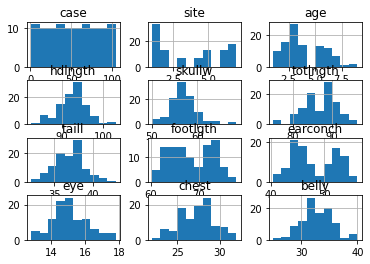

In [9]:
# check the distribution of data
df.hist()

Notes:

1- Each column has the the appropriate data type according to the output of 'dtype' function.

2- 2 columns have missing values as we found from the output of the 'info()' and 'isna()' functions.

4- No duplicated value was found accourding to 'duplicated()' function.

## EDA
### Research Question 1: What are the differences between the female and male sex?

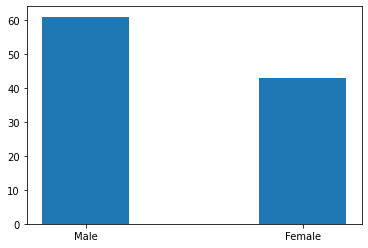

In [10]:
# check the count of females and males 
sex_counts = df['sex'].value_counts()
# create bar graph for sex_counts
sex = ['Male', 'Female']
plt.bar(sex, sex_counts, width = 0.4)
plt.show()

In [11]:
# dividing data into 2 parts: first part only hase data for males and the second has females data only
male_df = df[df['sex']== 'm']
female_df = df[df['sex']== 'f']

In [12]:
# check the success of last step
print(str('this data has {} unique value'.format(male_df['sex'].nunique())) + ' ' + 'and it\'s: {}'.format(male_df['sex'].unique()[0]))
print(str('this data has {} unique value'.format(female_df['sex'].nunique())) + ' ' + 'and it\'s: {}'.format(female_df['sex'].unique()[0]))

this data has 1 unique value and it's: m
this data has 1 unique value and it's: f


In [13]:
# check variables names
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case      104 non-null    int64  
 1   site      104 non-null    int64  
 2   Pop       104 non-null    object 
 3   sex       104 non-null    object 
 4   age       102 non-null    float64
 5   hdlngth   104 non-null    float64
 6   skullw    104 non-null    float64
 7   totlngth  104 non-null    float64
 8   taill     104 non-null    float64
 9   footlgth  103 non-null    float64
 10  earconch  104 non-null    float64
 11  eye       104 non-null    float64
 12  chest     104 non-null    float64
 13  belly     104 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 11.5+ KB


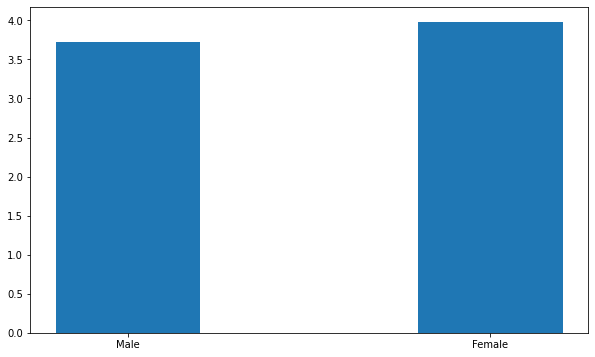

3.7288135593220337
3.9767441860465116


In [14]:
# creating bar chart showing the average age, between females and males
m_avrg_age = male_df['age'].mean()
f_avrg_age = female_df['age'].mean()
avrg_age = [m_avrg_age, f_avrg_age]
sex = ['Male', 'Female']
plt.figure(figsize=(10,6))
plt.bar(sex, avrg_age, width = 0.4)
plt.show()

print(m_avrg_age)
print(f_avrg_age)

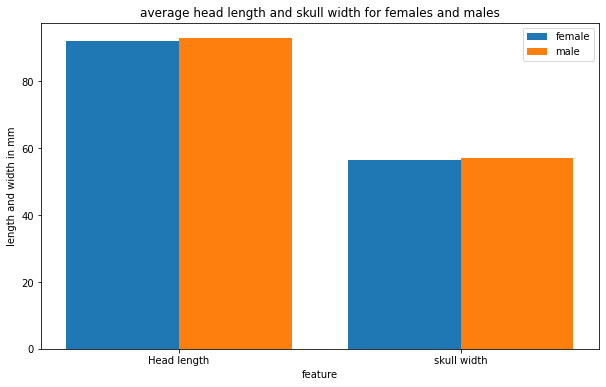

[92.14883720930233, 56.58837209302325]
[92.92295081967214, 57.091803278688516]


In [15]:
# creating bar chart showing the average hdlngth and skullw between females and males
X = ['Head length','skull width']
Yfemale = [female_df['hdlngth'].mean(), female_df['skullw'].mean()]
Zmale = [male_df['hdlngth'].mean(), male_df['skullw'].mean()]
  
X_axis = np.arange(len(X))

plt.figure(figsize=(10,6))
plt.bar(X_axis - 0.2, Yfemale, 0.4, label = 'female')
plt.bar(X_axis + 0.2, Zmale, 0.4, label = 'male')
  
plt.xticks(X_axis, X)
plt.xlabel("feature")
plt.ylabel("length and width in mm")
plt.title("average head length and skull width for females and males")
plt.legend()
plt.show()

print(Yfemale)
print(Zmale)

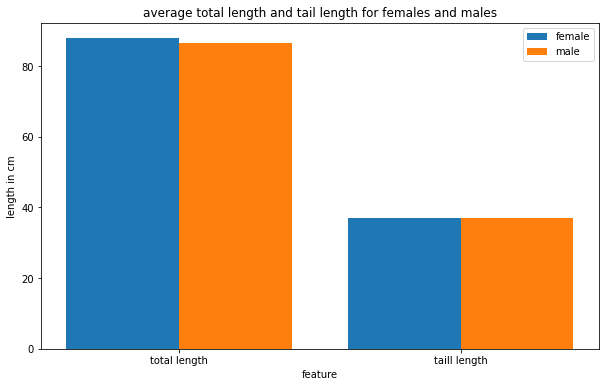

[87.90697674418605, 37.104651162790695]
[86.51147540983607, 36.942622950819676]


In [16]:
# creating bar chart showing the average totlngth and taill between females and males
X = ['total length','taill length']
Yfemale = [female_df['totlngth'].mean(), female_df['taill'].mean()]
Zmale = [male_df['totlngth'].mean(), male_df['taill'].mean()]
  
X_axis = np.arange(len(X))

plt.figure(figsize=(10,6))
plt.bar(X_axis - 0.2, Yfemale, 0.4, label = 'female')
plt.bar(X_axis + 0.2, Zmale, 0.4, label = 'male')
  
plt.xticks(X_axis, X)
plt.xlabel("feature")
plt.ylabel("length in cm")
plt.title("average total length and tail length for females and males")
plt.legend()
plt.show()

print(Yfemale)
print(Zmale)

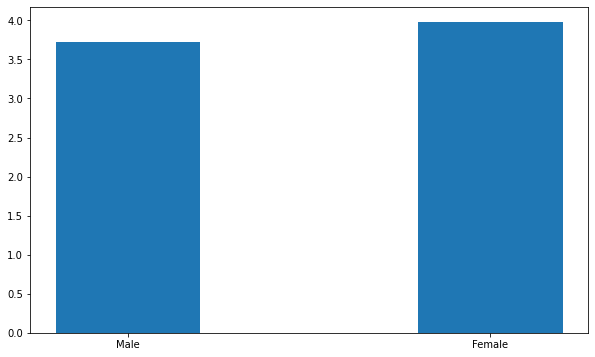

68.00983606557377
69.11190476190477


In [17]:
# creating bar chart showing the average footlgth between females and males
m_avrg_footlgth = male_df['footlgth'].mean()
f_avrg_footlgth = female_df['footlgth'].mean()
avrg_footlgth = [m_avrg_footlgth, f_avrg_footlgth]
sex = ['Male', 'Female']
plt.figure(figsize=(10,6))
plt.bar(sex, avrg_age, width = 0.4)
plt.show()

print(m_avrg_footlgth)
print(f_avrg_footlgth)

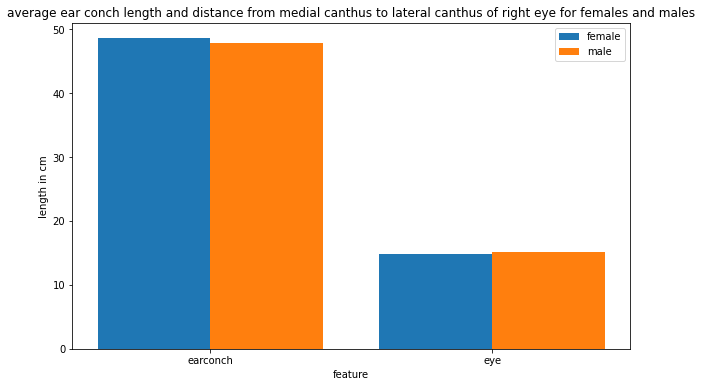

[48.57674418604652, 14.81162790697674]
[47.81639344262295, 15.211475409836066]


In [18]:
# creating bar chart showing the average earconch (ear conch length) and 
# eye (distance from medial canthus to lateral canthus of right eye) between females and males
X = ['earconch','eye']
Yfemale = [female_df['earconch'].mean(), female_df['eye'].mean()]
Zmale = [male_df['earconch'].mean(), male_df['eye'].mean()]
  
X_axis = np.arange(len(X))

plt.figure(figsize=(10,6))
plt.bar(X_axis - 0.2, Yfemale, 0.4, label = 'female')
plt.bar(X_axis + 0.2, Zmale, 0.4, label = 'male')
  
plt.xticks(X_axis, X)
plt.xlabel("feature")
plt.ylabel("length in cm")
plt.title("average ear conch length and distance from medial canthus to lateral canthus of right eye for females and males")
plt.legend()
plt.show()

print(Yfemale)
print(Zmale)

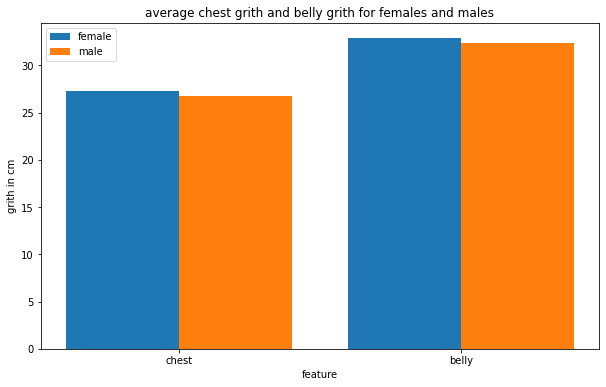

[27.337209302325583, 32.883720930232556]
[26.762295081967213, 32.377049180327866]


In [19]:
# creating bar chart showing the average chest grith and belly grith for males and females
X = ['chest','belly']
Yfemale = [female_df['chest'].mean(), female_df['belly'].mean()]
Zmale = [male_df['chest'].mean(), male_df['belly'].mean()]
  
X_axis = np.arange(len(X))

plt.figure(figsize=(10,6))
plt.bar(X_axis - 0.2, Yfemale, 0.4, label = 'female')
plt.bar(X_axis + 0.2, Zmale, 0.4, label = 'male')
  
plt.xticks(X_axis, X)
plt.xlabel("feature")
plt.ylabel("grith in cm")
plt.title("average chest grith and belly grith for females and males")
plt.legend()
plt.show()

print(Yfemale)
print(Zmale)

## Notes:
1- Females have greater average age than males (this could be an indicator that females tend to live more than males)

2- Males have greater average head length and skull width than females.

3- Females have slightly greater total length and taill length than males.

4- Females have greater foot length than males.

5- Females have greater chest and belly grith than males.

## Making some prediction using Random forest and XGboost algorithms

### Research Question 2: can we predict the sex of Possums using body dimensions?

# Random forest model to predict Possums sex

In [20]:
# Ordinal Encoding for sex column
sex_dict = {'m': 1, 'f': 0}
sex_list_num = []
for gender in df['sex']:
    for key, value in sex_dict.items():
        if gender in key:
            sex_list_num.append(sex_dict[gender])
# add the converted sex column to data           
df['gender']= sex_list_num
# drop sex column from data
df_num = df.drop('sex', axis = 1)
# check the first rows of data
df.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly,gender
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0,1
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0,0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0,0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0,0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0,0


In [21]:
# check the first rows of data
df_num.head()

,case,site,Pop,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly,gender
0,1,1,Vic,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0,1
1,2,1,Vic,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0,0
2,3,1,Vic,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0,0
3,4,1,Vic,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0,0
4,5,1,Vic,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0,0


In [29]:
# Select subset of predictors
cols_to_use = ['hdlngth', 'skullw', 'totlngth', 'taill', 'footlgth', 'earconch', 'eye', 'chest', 'belly']
X = df_num[cols_to_use]

# Select target
y = df_num.gender

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score

In [37]:
# Creating a pipline for preprocessing steps (fill null values..etc)
my_pipeline = Pipeline(steps=[('preprocessor', SimpleImputer()),
                              ('model', RandomForestClassifier(n_estimators=1000,
                                                              random_state=0))
                             ])

# Calculate cross-validation score
cv_scores = cross_val_score(my_pipeline, X, y, 
                            cv=5,
                            scoring='accuracy')

print("Cross-validation accuracy: %f" % cv_scores.mean())

Cross-validation accuracy: 0.567619


# Would model accuracy increase if we use age variable with body dimensions to predict Possums sex ?


In [41]:
# Select subset of predictors
cols_to_use = ['hdlngth', 'skullw', 'totlngth', 'taill', 'footlgth', 'earconch', 'eye', 'chest', 'belly', 'age']
X = df_num[cols_to_use]

# Select target
y = df_num.gender

In [42]:
# Creating a pipline for preprocessing steps (fill null values..etc)
my_pipeline = Pipeline(steps=[('preprocessor', SimpleImputer()),
                              ('model', RandomForestClassifier(n_estimators=1000,
                                                              random_state=0))
                             ])

# Calculate cross-validation score
cv_scores = cross_val_score(my_pipeline, X, y, 
                            cv=5,
                            scoring='accuracy')

print("Cross-validation accuracy: %f" % cv_scores.mean())

Cross-validation accuracy: 0.577143


## Making some prediction using Random forest and XGboost algorithms

### Research Question 3: can we predict the age of Possums using body dimensions?

# Random forest model to predict Possums age

In [63]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Select subset of predictors
cols_to_use = ['hdlngth', 'skullw', 'totlngth', 'taill', 'footlgth', 'earconch', 'eye', 'chest', 'belly', 'sex']
X = df[cols_to_use]

# Select target
y = df.age
y= y.fillna(method= 'backfill')

# Define numerical columns
numerical_cols =['hdlngth', 'skullw', 'totlngth', 'taill', 'footlgth', 'earconch', 'eye', 'chest', 'belly']
# Define categorical columns
categorical_cols= ['sex']

# Preprocessing for numerical data
numerical_transformer = SimpleImputer(strategy='constant')

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])


# Define the model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=1000, random_state=0)

# Bundle preprocessing and modeling code in a pipeline
my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)
                             ])

# Calculate cross-validation score
cv_scores = -1 * cross_val_score(my_pipeline, X, y, 
                            cv=5,
                            scoring='neg_mean_absolute_error')

print("Cross-validation accuracy: %f" % cv_scores.mean())

Cross-validation accuracy: 1.478658


# XGboost model to predict Possums age

In [72]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Select subset of predictors
cols_to_use = ['hdlngth', 'skullw', 'totlngth', 'taill', 'footlgth', 'earconch', 'eye', 'chest', 'belly', 'sex']
X = df[cols_to_use]

# Select target
y = df.age
y= y.fillna(method= 'backfill')

# Define numerical columns
numerical_cols =['hdlngth', 'skullw', 'totlngth', 'taill', 'footlgth', 'earconch', 'eye', 'chest', 'belly']
# Define categorical columns
categorical_cols= ['sex']

# Preprocessing for numerical data
numerical_transformer = SimpleImputer(strategy='constant')

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])


# Define the model
from xgboost import XGBRegressor
model = XGBRegressor(n_estimators=500, learning_rate=0.05)

# Bundle preprocessing and modeling code in a pipeline
my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)
                             ])

# Calculate cross-validation score
cv_scores = -1 * cross_val_score(my_pipeline, X, y, 
                            cv=5,
                            scoring='neg_mean_absolute_error')

print("Cross-validation accuracy: %f" % cv_scores.mean())

Cross-validation accuracy: 1.589771


# Conclusion:

1- Avaliable data showing that 'age' variable can increase model accuracy to predict Possums 'sex' if added to body dimensions variables using RF classifier.

2 - Avaliable data shwoing that RF model is better in prediction of Possums age using body dimensions  variable.

## Limitations:
1- The dataset is very small to train models (104 samples), I think that's why models scores are quite poor.